In [ ]:
! pip install wandb

     |████████████████████████████████| 2.1MB 10.8MB/s 
     |████████████████████████████████| 133kB 39.8MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 163kB 26.9MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=66bdf66bec388bb6323550e264f10da32cee18145a0c1147baa615a4dd2744c0
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=b03a8cbf4aed378c57e7d17aafbe8951e9713febaf92dfd4decba3d74dc292ed
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
import wandb

In [ ]:
# import numpy as np
# import os
# import random
# import cv2
# from keras.utils import to_categorical
# import math

# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
# from keras import regularizers
# from keras.layers import BatchNormalization
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import ImageDataGenerator

# from numpy import expand_dims
# from keras.preprocessing.image import load_img

# from matplotlib import pyplot

import tensorflow as tf
import numpy as np
import math
import os
import random
import cv2
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#4/1AY0e-g5A33WgmAv7RsYj81gtQSQa_dUhxU-NUTTWp3hhmJUKfWv9Di4Rwmk

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/demo_augumentation/Fungi | wc -l

1177


In [ ]:
dir_train = "/content/drive/MyDrive/demo_augumentation"
# dir_train = "/content/drive/MyDrive/nature_12k_new/inaturalist_12K/train"
# dir_val = "/content/drive/MyDrive/nature_12k_new/inaturalist_12K/val"
class_list = os.listdir(dir_train)
if '.DS_Store' in class_list:
  class_list.remove('.DS_Store')
class_list

['Reptilia',
 'Mollusca',
 'Animalia',
 'Amphibia',
 'Aves',
 'Mammalia',
 'Insecta',
 'Plantae',
 'Arachnida',
 'Fungi']

In [ ]:
num_per_cls = 600

In [ ]:
  # Load data
  ######### FOURTH CODE ############################

  x_amp_train = []
  x_amp_test = []

  y_amp_train = []
  y_amp_test = []

  # num_per_cls = config.epochs
    
  for i in range(len(class_list)):
    dir = dir_train+"/"+class_list[i]
    #img_name = random.choices(os.listdir(dir), k=(num_per_cls+math.ceil(0.1*num_per_cls)))
    img_name = random.sample(os.listdir(dir), k=(num_per_cls+math.ceil(0.1*num_per_cls)))
    for inc in range(num_per_cls):
      # print(inc)
      # print(img_name[inc])
      img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (400,400))
      # print(type(img))
      if img is not None:
          x_amp_train.append(img)
          y_amp_train.append(i)

        # print("----------------------------------------")
    for inc in range(num_per_cls, num_per_cls+math.ceil(0.1*num_per_cls)):
      # print(inc)
      # print(img_name[inc])
      img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (400,400))
      if img is not None:
          x_amp_test.append(img)
          y_amp_test.append(i)
    print(len(x_amp_train), len(x_amp_test))

      ######### FOURTH CODE ############################

600 60
1200 120
1800 180
2400 240
3000 300
3600 360
4200 420
4800 480
5400 540
6000 600


In [ ]:
    y_amp_train = to_categorical(y_amp_train)
    y_amp_test = to_categorical(y_amp_test)

In [ ]:
    x_amp_train = np.array(x_amp_train)
    x_amp_test = np.array(x_amp_test) 

In [ ]:
dir_no_aug_train ='/content/drive/MyDrive/nature_12k_new/inaturalist_12K/train'


In [ ]:
x_no_aug_train = []
x_no_aug_test = []

y_no_aug_train = []
y_no_aug_test = []

  # num_per_cls = config.epochs
    
for i in range(len(class_list)):
  dir = dir_no_aug_train+"/"+class_list[i]
  #img_name = random.choices(os.listdir(dir), k=(num_per_cls+math.ceil(0.1*num_per_cls)))
  img_name = random.sample(os.listdir(dir), k=(num_per_cls+math.ceil(0.1*num_per_cls)))
  for inc in range(num_per_cls):
    # print(inc)
    # print(img_name[inc])
    img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (400,400))
    # print(type(img))
    if img is not None:
        x_no_aug_train.append(img)
        y_no_aug_train.append(i)
       # print("----------------------------------------")
  for inc in range(num_per_cls, num_per_cls+math.ceil(0.1*num_per_cls)):
    # print(inc)
    # print(img_name[inc])
    img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (400,400))
    if img is not None:
        x_no_aug_test.append(img)
        y_no_aug_test.append(i)
  print(len(x_no_aug_train), len(x_no_aug_test))

600 60
1200 120
1800 180
2400 240
3000 300
3600 360
4200 420
4800 480
5400 540
6000 600


In [ ]:
  y_no_aug_train = to_categorical(y_no_aug_train)
  y_no_aug_test = to_categorical(y_no_aug_test)

In [ ]:
  x_no_aug_train = np.array(x_no_aug_train)
  x_no_aug_test = np.array(x_no_aug_test) 

In [ ]:
print(len(x_amp_train),len(x_amp_test))

6000 600


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation="relu",input_shape=(400,400,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"))
model.add(Dropout(0.2))
for i in range(4):
  model.add(Conv2D(32, kernel_size=3, activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"))
  model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax", kernel_regularizer=regularizers.l2(0.001)))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_amp_train, y_amp_train, validation_data=(x_amp_test, y_amp_test), epochs=10)

Epoch 1/10
188/188 [==============================] - 85s 281ms/step - loss: 3.0005 - accuracy: 0.1428 - val_loss: 2.6332 - val_accuracy: 0.1500
Epoch 2/10
188/188 [==============================] - 50s 266ms/step - loss: 2.4373 - accuracy: 0.2429 - val_loss: 2.5321 - val_accuracy: 0.1683
Epoch 3/10
188/188 [==============================] - 50s 266ms/step - loss: 2.3490 - accuracy: 0.2771 - val_loss: 2.3257 - val_accuracy: 0.2550
Epoch 4/10
188/188 [==============================] - 50s 266ms/step - loss: 2.2083 - accuracy: 0.3154 - val_loss: 2.5900 - val_accuracy: 0.1950
Epoch 5/10
188/188 [==============================] - 50s 265ms/step - loss: 2.0968 - accuracy: 0.3575 - val_loss: 2.4405 - val_accuracy: 0.2400
Epoch 6/10
188/188 [==============================] - 50s 266ms/step - loss: 2.0444 - accuracy: 0.3720 - val_loss: 2.7049 - val_accuracy: 0.2183
Epoch 7/10
188/188 [==============================] - 50s 266ms/step - loss: 1.9538 - accuracy: 0.4110 - val_loss: 2.1504 - val_ac

In [ ]:
model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[2].output)

In [ ]:
img=x_amp_test[0]
# convert the image to an array
img = tf.keras.preprocessing.image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img =tf.expand_dims(img, axis=0)
img = tf.keras.applications.resnet.preprocess_input(img)
feature_maps = model.predict(img)

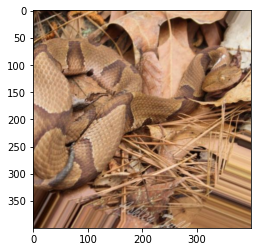

In [ ]:
plt.imshow(x_amp_test[0])

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


_runtime,29
_timestamp,1618410762
_step,31


_runtime,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▇▇▇▇█
_timestamp,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▇▇▇▇█
_step,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇███


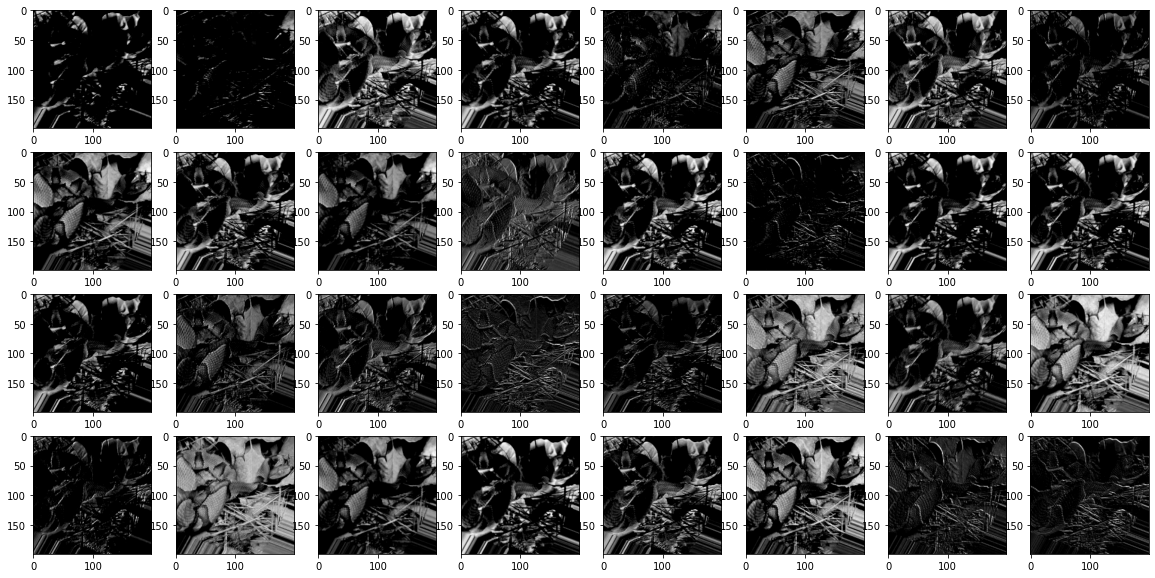

In [ ]:
wandb.init(project="Convolution_Neural_Network_modules")
plt.figure(figsize=(20, 10))
for i in range(0,32):
  img=plt.subplot(4, 8,i+1)
  #img.set_title(classes[i])
  img = plt.imshow(feature_maps[0, :, :, i],cmap='gray')
  wandb.log({"img": [wandb.Image(img)]})
wandb.finish()

In [ ]:
# plt.imshow(x_amp_test[0])

In [ ]:
# Configure the sweep – specify the parameters to search through, the search strategy, the optimization metric et all.
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'epochs': {
            'values': [5, 10, 15,20]
        },
        'number_of_filters': { 
            'values': [16,32, 64]
        },
        'filter_organisation': {
            'values': [2,1,0.5]
        },
        'data_augmentation':{
            'values':[False,True,True]
        },
        'Batch_normalization':{
            'values':[False,True,True]
        },
        'kernel_size':{
            'values':[3,5,7]
        },
        'neurons_in_denseLyr':{
            'values':[32,64,128,256]
        },
        'dropout':{
            'values':[0.2,0.3]
        },
        'weight_decay':{
           'values': [1e-1, 1e-2, 1e-3]
        },
        'no_of_layers':{
            'values':[4,5,6,7]
        },
        'batch_size':{
            'values':[16,32,64]
        }
              
        
        #'activation': {
            # 'values': ['relu', 'elu', 'selu', 'softmax']
         #   'values': ['sigmoid','tanh','ReLu']
        #}
        
        
    }
}

In [ ]:
x_amp_train[0].shape

(400, 400, 3)

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="dl_45_47", project="Convolution_Neural_Network_modules")

Create sweep with ID: jtnlmuc8
Sweep URL: https://wandb.ai/dl_45_47/Convolution_Neural_Network_modules/sweeps/jtnlmuc8


In [ ]:
# The sweep calls this function with each set of hyperparameters
def train():
  # Default values for hyper-parameters we're going to sweep over
    config_defaults = {
        'epochs': 5,
        'number_of_filters': 32,
        'filter_organisation': 1,
        'data_augmentation' : True,
        'Batch_normalization': True,
        'neurons_in_denseLyr':64,
        'kernel_size':3,
        'dropout':0.2,
        'weight_decay':1e-2,
        'no_of_layers': 5,
        'batch_size': 16
    }


    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config

    if config.data_augmentation :
      x_train=x_amp_train
      y_train=y_amp_train
      x_test=x_amp_test
      y_test=y_amp_test
    else:
      x_train=x_no_aug_train
      y_train=y_no_aug_train
      x_test=x_no_aug_test
      y_test=y_no_aug_test

    filter_no=config.number_of_filters 

    #create model
    model = Sequential()    

    #add model layers
    # if config.Batch_normalization :
    #   # model.add(BatchNormalization(input_shape=(500,500,3)))
    #   model.add(BatchNormalization(input_shape=(400,400,3)))
    #   model.add(Dropout(config.dropout))
    # else:
    #   # model.add(Dropout(config.dropout, input_shape=(500,500,3)))
    #   model.add(Dropout(config.dropout, input_shape=(400,400,3)))
    model.add(Conv2D(filter_no, kernel_size=config.kernel_size, activation="relu", input_shape=(400,400,3)))
    if config.Batch_normalization :
      model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"))
    model.add(Dropout(config.dropout))
    for i in range(config.no_of_layers-1):
      filter_no=math.ceil(filter_no*config.filter_organisation)
      #filter_no =math.ceil(config.number_of_filters*pow(config.filter_organisation,(i+1)))
      if(filter_no < 8 or filter_no > 256 ):
        filter_no=config.number_of_filters
      model.add(Conv2D(filter_no, kernel_size=config.kernel_size, activation="relu"))
      if config.Batch_normalization :
        model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"))
      model.add(Dropout(config.dropout))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(config.weight_decay)))
    if config.Batch_normalization :
      model.add(BatchNormalization())
    model.add(Dropout(config.dropout))
    model.add(Dense(10, activation="softmax", kernel_regularizer=regularizers.l2(config.weight_decay)))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=config.epochs, batch_size=config.batch_size) ################################################

    accuracy, loss, val_accuracy, val_loss = history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss']

    # wandb.log({'val_loss' : val_loss, 'val_accuracy': val_accuracy})

    for i in range(config.epochs):
      wandb.log({'val_loss' : val_loss[i], 'val_accuracy': val_accuracy[i],'loss' : loss[i], 'accuracy': accuracy[i], 'epoch': i})

    # print("error :",error)
    # print("val_error :",val_error)
    # print("accuracy :",accuracy)
    # print("val_accuracy :",val_accuracy)
    # print("mse :",mse)
    # print("val_mse :",val_mse)

    # arr_conf = np.array([[0 for _ in range(10)] for _ in range(10)])

    # y_val_predict = []
    # acc_test_set = 0
    # for i in range(len(y_test)):
    #   y_hat = predict(w,b,x_test[i].reshape(784),wandb.config)
    #   y_val_predict.append(np.argmax(y_hat))
    #   if(y_hat[y_test[i]] == max(y_hat)): acc_test_set +=1
    # # print(y_val_predict)

    # acc_test_set /= len(y_test)

    # for i in range(len(y_val_predict)):
    #     arr_conf[y_test[i]][y_val_predict[i]] +=1
    #     # print(Y_val[i], y_val_predict[i])
    # print(arr_conf)
    
    # df_conf = pd.DataFrame(arr_conf, index = labels, columns = labels)
    # df_conf.index.name = 'Actual'
    # df_conf.columns.name = 'Predicted'

    # # ax = plt.axes()
    # # plt.subplots(figsize = (18,12))
    # # sn.set(font_scale=1.2)#for label size
    # # ax.set_title('Accuracy on test data set : %i' %acc_test_set)
    # # plt.show()
    # confusion_matrix_heatmap = sn.heatmap(df_conf, annot=True,annot_kws={"size": 13})# font size

    # for i in range(config.epochs):
    #   wandb.log({'val_loss' : val_error[i], 'val_accuracy': val_accuracy[i],'loss' : error[i], 'accuracy': accuracy[i], 'mse': mse[i], 'val_mse': val_mse[i], 'epoch': i})

    # wandb.log({"conf_mat" : confusion_matrix_heatmap})

    
    #error=cross_entropy(w,b,wandb.config)
    #wandb.log()
    # print(w)
    # print(b)
    # wandb.finish()

In [ ]:
wandb.agent(sweep_id, train)
# Notice how Keras is complaining that our volume is too small. You will encounter similar errors for other pre-trained networks as well. When you see this type of error, you know you need to increase 
# your input image dimensions.